<a href="https://colab.research.google.com/github/vanditasharma777/M/blob/main/MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten,Softmax,Conv2D, MaxPooling2D
from keras import backend as k
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
import sklearn
batch_size = 64
num_classes = 10
epochs = 12

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
from keras.utils import np_utils
# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_train.shape,y_test.shape


((60000, 10), (10000, 10))

In [ ]:
## only for mnist becuase mnist is grayscale so , we are converting them rgb (three dimensional)
import numpy as np
import cv2
dim = (48, 48)

#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list = []
#convert X_train data to 48x48 rgb values
for i in range(len(x_train)):
    rgb = to_rgb(x_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
x_train_rgb = np.stack([rgb_list],axis=4)
x_train_rgb_3d = np.squeeze(x_train_rgb, axis=4)
print(x_train_rgb_3d.shape)

(60000, 48, 48, 3)


In [ ]:
## only for mnist becuase mnist is grayscale so , we are converting them rgb (three dimensional)

import cv2
dim = (48, 48)

#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list = []
#convert X_train data to 48x48 rgb values
for i in range(len(x_test)):
    rgb = to_rgb(x_test[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
x_test_rgb = np.stack([rgb_list],axis=4)
x_test_rgb_3d = np.squeeze(x_test_rgb, axis=4)
print(x_test_rgb_3d.shape)

(10000, 48, 48, 3)


In [ ]:
vgg16_model = VGG16(weights = 'imagenet',include_top=False,input_shape=(48,48,3))

for layer in vgg16_model.layers: 
    layer.trainable = False


vgg16_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]: 
    model.add(layer)
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [ ]:
from tensorflow.keras.optimizers import Adam,Adagrad

In [ ]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist = model.fit(x_train_rgb_3d, y_train,batch_size=64,epochs=5,verbose=1,validation_data=(x_test_rgb_3d, y_test)).history

Epoch 1/5
938/938 [==============================] - 34s 25ms/step - loss: 0.4464 - accuracy: 0.8978 - val_loss: 0.1659 - val_accuracy: 0.9536
Epoch 2/5
938/938 [==============================] - 22s 24ms/step - loss: 0.1041 - accuracy: 0.9683 - val_loss: 0.1177 - val_accuracy: 0.9669
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.1126 - val_accuracy: 0.9686
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0531 - accuracy: 0.9828 - val_loss: 0.0971 - val_accuracy: 0.9728
Epoch 5/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.0916 - val_accuracy: 0.9740


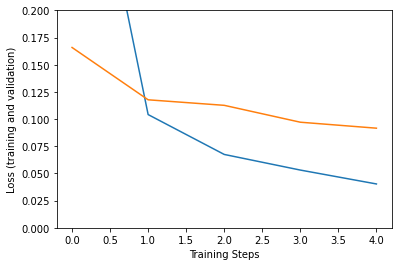

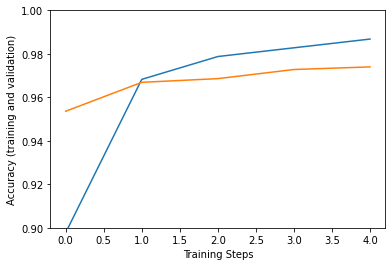

In [ ]:
import matplotlib.pylab as plt
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,0.2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0.9,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [ ]:
model.save("MNIST.h5")